In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=["sepal_length","sepal_width","petal_length","petal_width","target"])
df.head()


In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="target")

In [ ]:
sns.heatmap(df.iloc[:,0:4].corr())

# Padronização

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

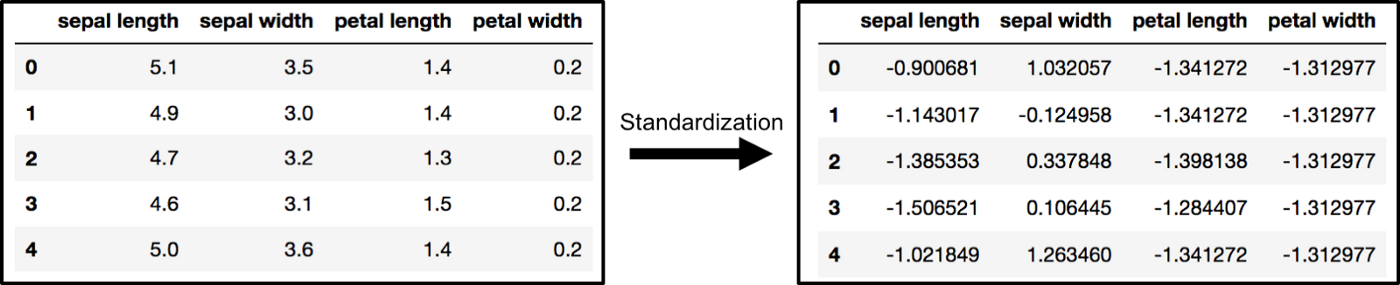

In [ ]:
pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["PC1", "PC2","PC3","PC4"])

In [ ]:
principalDf

In [ ]:
pca.explained_variance_ratio_


In [ ]:
# Avaliando a variação acumulada dos dois PC
sum(pca.explained_variance_ratio_[0:2])*100

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(principalDf)

In [ ]:
sns.heatmap(principalDf.corr())

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2","PC3","PC4"], index=df.columns[:-1])
loadings

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=["PC1", "PC2","PC3","PC4"], index=df.columns[:-1])
loading_matrix

# Visualizando

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep,"PC1"]
               , finalDf.loc[indicesToKeep, "PC2"]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()